In [44]:
import re
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [25]:
uploaded = files.upload()

Saving WhatsApp Chat with Gen-du's.txt to WhatsApp Chat with Gen-du's (1).txt


In [26]:
filename = list(uploaded.keys())[0]

In [27]:
with open(filename, 'r', encoding='utf-8') as file:
    chat = file.readlines()

In [31]:
chat[:20]

['17/10/24, 22:57 - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.\n',
 '17/10/24, 22:50 - Mohammed Varaliya KJ mca created group ""**" Lads"\n',
 '17/10/24, 22:57 - Mohammed Varaliya KJ mca added you\n',
 '17/10/24, 22:57 - Mohammed Varaliya KJ mca: .\n',
 '17/10/24, 22:58 - Mohammed Varaliya KJ mca added Ayush KJ, Shreyash Patekar KJ, Soham K. KJ and Vraj Shah Kj\n',
 '17/10/24, 22:59 - Mohammed Varaliya KJ mca: <Media omitted>\n',
 '17/10/24, 23:04 - Mohammed Varaliya KJ mca: <Media omitted>\n',
 '17/10/24, 23:05 - Mohammed Varaliya KJ mca: Ye hai Quick Sort aj ka submission\n',
 '17/10/24, 23:15 - Mohammed Varaliya KJ mca: <Media omitted>\n',
 '17/10/24, 23:16 - Mohammed Varaliya KJ mca: https://mohammed-varaliya.notion.site/Assignment-6-1229033ff715803aabc8ce9d34367ee2?pvs=4\n',
 '17/10/24, 23:16 - Mohammed Varaliya KJ mca: Ye hai isme content \n',
 '\n',
 'Edit karke khud ka banake daaldo\n',
 "17/10/24, 23:19

In [30]:
pattern = r"^(\d{1,2}/\d{1,2}/\d{2}), (\d{1,2}:\d{2}) - "

for line in chat:
    match = re.match(pattern, line)
    if match:
        print("Matched:", match.group())
    else:
        print("Not matched:", line.strip())


Matched: 17/10/24, 22:57 - 
Matched: 17/10/24, 22:50 - 
Matched: 17/10/24, 22:57 - 
Matched: 17/10/24, 22:57 - 
Matched: 17/10/24, 22:58 - 
Matched: 17/10/24, 22:59 - 
Matched: 17/10/24, 23:04 - 
Matched: 17/10/24, 23:05 - 
Matched: 17/10/24, 23:15 - 
Matched: 17/10/24, 23:16 - 
Matched: 17/10/24, 23:16 - 
Not matched: 
Not matched: Edit karke khud ka banake daaldo
Matched: 17/10/24, 23:19 - 
Matched: 17/10/24, 23:22 - 
Matched: 17/10/24, 23:22 - 
Matched: 17/10/24, 23:26 - 
Matched: 17/10/24, 23:27 - 
Matched: 17/10/24, 23:28 - 
Matched: 17/10/24, 23:28 - 
Matched: 17/10/24, 23:28 - 
Matched: 18/10/24, 19:09 - 
Matched: 18/10/24, 19:12 - 
Matched: 18/10/24, 19:15 - 
Matched: 18/10/24, 19:15 - 
Matched: 18/10/24, 19:17 - 
Matched: 18/10/24, 19:54 - 
Matched: 18/10/24, 19:55 - 
Matched: 18/10/24, 19:56 - 
Matched: 18/10/24, 19:56 - 
Not matched: 
Not matched: Tu mat aa yaha pe
Matched: 18/10/24, 19:57 - 
Matched: 19/10/24, 18:11 - 
Matched: 19/10/24, 18:11 - 
Matched: 19/10/24, 18:27 - 

In [32]:
pattern2 = r"^(\d{1,2}/\d{1,2}/\d{2}), (\d{1,2}:\d{2}) - ([^:]+):"

for line in chat:
    match = re.match(pattern2, line)
    if match:
        date = match.group(1)
        time = match.group(2)
        sender = match.group(3)
        print(f"Date: {date}")
        print(f"Time: {time}")
        print(f"Sender: {sender}")
    else:
        print("No matches")

No matches
No matches
No matches
Date: 17/10/24
Time: 22:57
Sender: Mohammed Varaliya KJ mca
No matches
Date: 17/10/24
Time: 22:59
Sender: Mohammed Varaliya KJ mca
Date: 17/10/24
Time: 23:04
Sender: Mohammed Varaliya KJ mca
Date: 17/10/24
Time: 23:05
Sender: Mohammed Varaliya KJ mca
Date: 17/10/24
Time: 23:15
Sender: Mohammed Varaliya KJ mca
Date: 17/10/24
Time: 23:16
Sender: Mohammed Varaliya KJ mca
Date: 17/10/24
Time: 23:16
Sender: Mohammed Varaliya KJ mca
No matches
No matches
No matches
No matches
No matches
Date: 17/10/24
Time: 23:26
Sender: Mohammed Varaliya KJ mca
Date: 17/10/24
Time: 23:27
Sender: Jayesh
Date: 17/10/24
Time: 23:28
Sender: Mohammed Varaliya KJ mca
Date: 17/10/24
Time: 23:28
Sender: Mohammed Varaliya KJ mca
No matches
Date: 18/10/24
Time: 19:09
Sender: Mohammed Varaliya KJ mca
Date: 18/10/24
Time: 19:12
Sender: Mohammed Varaliya KJ mca
Date: 18/10/24
Time: 19:15
Sender: Soham K. KJ
Date: 18/10/24
Time: 19:15
Sender: Soham K. KJ
Date: 18/10/24
Time: 19:17
Sender:

In [36]:
pattern = r"^(\d{1,2}/\d{1,2}/\d{2}), (\d{1,2}:\d{2}) - ([^:]+): (.*)"

timestamps = []
senders = []
messages = []

for line in chat:
    line = line.strip()
    match = re.match(pattern, line)
    if match:
        date, time, sender, message = match.groups()
        timestamps.append(f"{date} {time}")
        senders.append(sender)
        messages.append(message)
    else:
        # Handle multiline messages by appending to the last message
        if messages:
            messages[-1] += " " + line

In [37]:
df = pd.DataFrame({
    "timestamp": timestamps,
    "sender": senders,
    "message": messages,
})

In [41]:
df

,timestamp,sender,message
0,17/10/24 22:57,Mohammed Varaliya KJ mca,". 17/10/24, 22:58 - Mohammed Varaliya KJ mca a..."
1,17/10/24 22:59,Mohammed Varaliya KJ mca,<Media omitted>
2,17/10/24 23:04,Mohammed Varaliya KJ mca,<Media omitted>
3,17/10/24 23:05,Mohammed Varaliya KJ mca,Ye hai Quick Sort aj ka submission
4,17/10/24 23:15,Mohammed Varaliya KJ mca,<Media omitted>
...,...,...,...
1973,02/10/25 17:42,Vraj Shah Kj,"<Media omitted> 02/10/25, 17:44 - Durvesh Kulk..."
1974,02/10/25 17:44,Durvesh Kulkarni KJ,<Media omitted>
1975,02/10/25 17:44,Durvesh Kulkarni KJ,<Media omitted>
1976,02/10/25 17:44,Durvesh Kulkarni KJ,<Media omitted>


In [43]:
count = (df['sender'] == 'Jayesh').sum()
print(count)

524


In [47]:
sns.set(style="whitegrid")

In [48]:
message_counts = df['sender'].value_counts()

/tmp/ipython-input-2028200735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=message_counts.index, y=message_counts.values, palette="viridis")


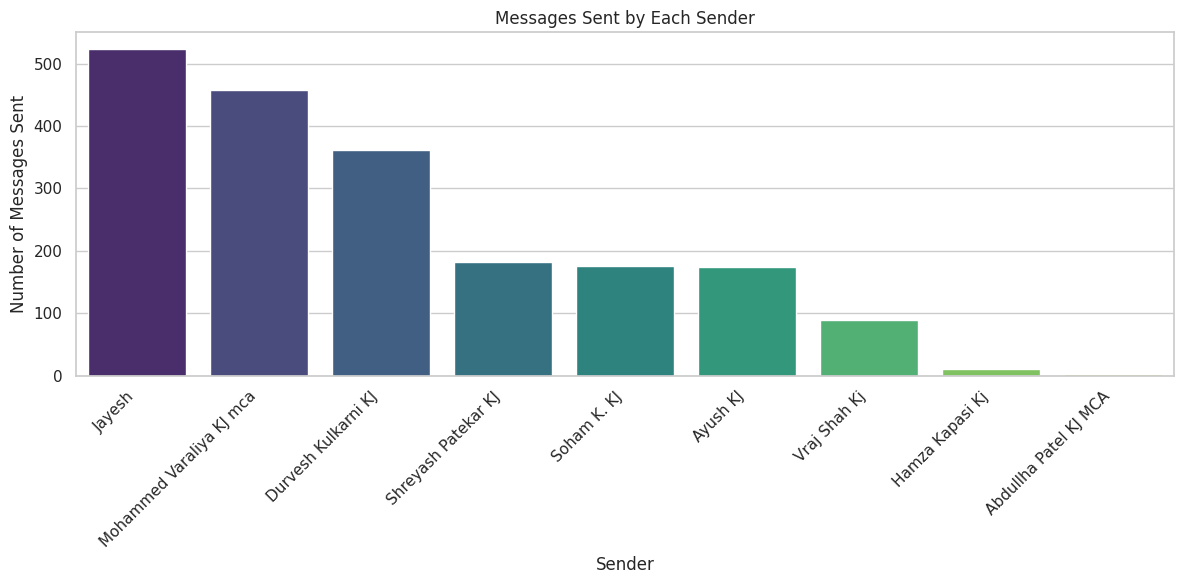

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(x=message_counts.index, y=message_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sender')
plt.ylabel('Number of Messages Sent')
plt.title('Messages Sent by Each Sender')
plt.tight_layout()
plt.show()

### Messages Over Time (Line Plot)

/tmp/ipython-input-693690239.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  messages_per_hour = df.resample('H').size()


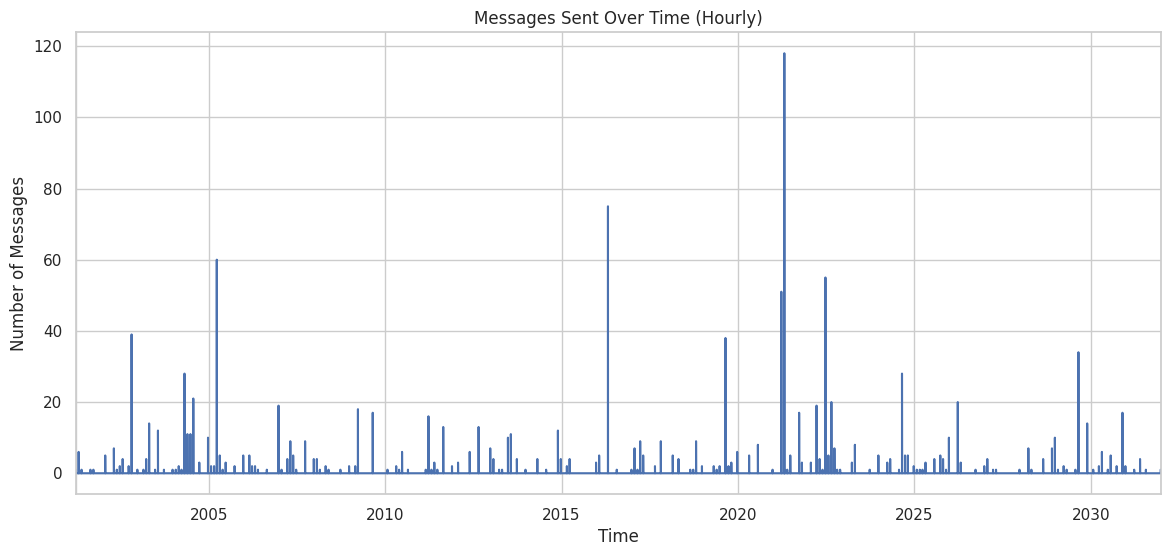

In [52]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%y/%m/%d %H:%M')

df.set_index('timestamp', inplace=True)
messages_per_hour = df.resample('H').size()

plt.figure(figsize=(14,6))
messages_per_hour.plot()
plt.xlabel('Time')
plt.ylabel('Number of Messages')
plt.title('Messages Sent Over Time (Hourly)')
plt.show()

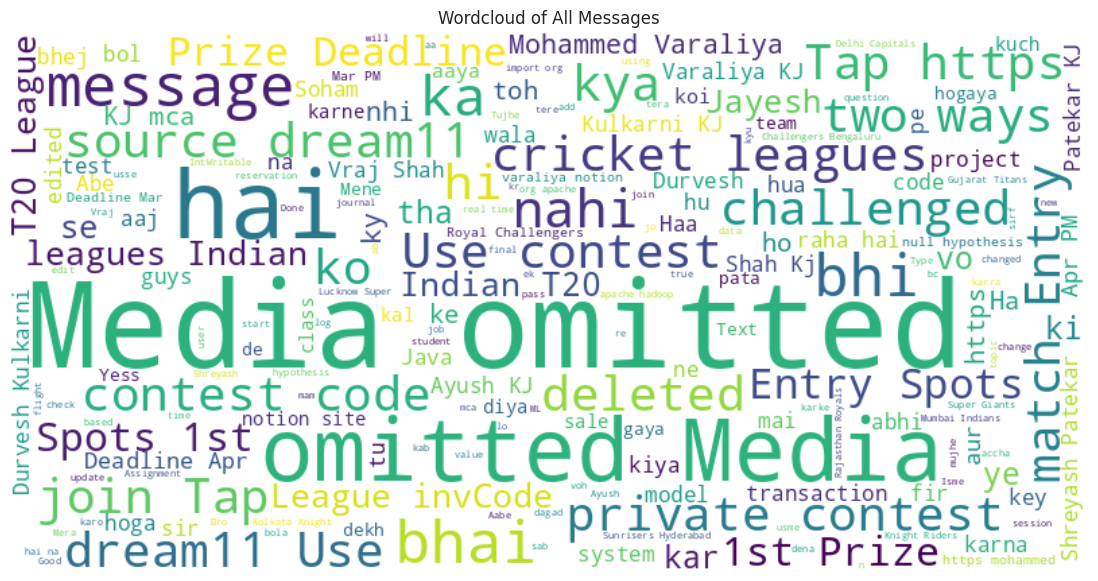

In [53]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['message'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of All Messages')
plt.show()